In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
from config import gkey
from scipy.stats import linregress

In [105]:
#read census poverty data
poverty_df = pd.read_csv('2007_2016_poverty.csv')

In [106]:
poverty_df.head()

,Year,State,County ID,State / County Name,All Ages SAIPE Poverty Universe,All Ages in Poverty Count,All Ages in Poverty Count LB 90%,All Ages in Poverty Count UB 90%,90% Confidence Interval (All Ages in Poverty Count),All Ages in Poverty Percent,...,Under Age 5 in Poverty Count UB 90%,90% Confidence Interval (Under Age 5 in Poverty Count),Under Age 5 in Poverty Percent,Under Age 5 in Poverty Percent LB 90%,Under Age 5 in Poverty Percent UB 90%,90% Confidence Interval (Under Age 5 in Poverty Percent),Median Household Income in Dollars,Median Household Income in Dollars LB 90%,Median Household Income in Dollars UB 90%,90% Confidence Interval (Median Household Income in Dollars)
0,2016,1,1001,Autauga County (AL),"54,939","7,444","6,255","8,633","6,255 to 8,633",13.5,...,NaN,NaN,NaN,NaN,NaN,NaN,"$54,487","$50,886","$58,088","$50,886 to $58,088"
1,2015,1,1001,Autauga County (AL),"54,860","6,966","5,673","8,259","5,673 to 8,259",12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,"$56,580","$51,459","$61,701","$51,459 to $61,701"
2,2014,1,1001,Autauga County (AL),"54,903","7,204","5,845","8,563","5,845 to 8,563",13.1,...,NaN,NaN,NaN,NaN,NaN,NaN,"$54,366","$50,916","$57,816","$50,916 to $57,816"
3,2013,1,1001,Autauga County (AL),"54,762","7,397","6,109","8,685","6,109 to 8,685",13.5,...,NaN,NaN,NaN,NaN,NaN,NaN,"$51,868","$48,314","$55,422","$48,314 to $55,422"
4,2012,1,1001,Autauga County (AL),"55,059","7,017","5,688","8,346","5,688 to 8,346",12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,"$51,441","$47,185","$55,697","$47,185 to $55,697"


In [107]:
#only keep needed columns
poverty_df = poverty_df[["Year","County ID","State / County Name","All Ages in Poverty Percent"]]

In [108]:
poverty_df.head()

,Year,County ID,State / County Name,All Ages in Poverty Percent
0,2016,1001,Autauga County (AL),13.5
1,2015,1001,Autauga County (AL),12.7
2,2014,1001,Autauga County (AL),13.1
3,2013,1001,Autauga County (AL),13.5
4,2012,1001,Autauga County (AL),12.7


In [109]:
#group by the County ID
poverty_group = poverty_df.groupby(["County ID"]).mean()

In [110]:
poverty_group.head()

,Year,All Ages in Poverty Percent
County ID,,
1001,2011.5,12.46
1003,2011.5,12.59
1005,2011.5,28.27
1007,2011.5,20.29
1009,2011.5,15.19


In [111]:
#read table of lat/lng cooridnates for counties
location_df = pd.read_csv('2017_counties.csv', encoding="ISO-8859-1")

In [112]:
location_df = location_df.rename(columns={'GEOID': "County ID","INTPTLAT": "Lat","INTPTLONG": "Lng"})

In [113]:
location_df.head()

,USPS,County ID,NAME,Lat,Lng
0,AL,1001,Autauga County,32.532237,-86.646440
1,AL,1003,Baldwin County,30.659218,-87.746067
2,AL,1005,Barbour County,31.870253,-85.405104
3,AL,1007,Bibb County,33.015893,-87.127148
4,AL,1009,Blount County,33.977358,-86.566440


In [114]:
#combine poverty data with county location data
merge_table = pd.merge(poverty_df, location_df, on="County ID", how="left")

In [115]:
merge_table.head()

,Year,County ID,State / County Name,All Ages in Poverty Percent,USPS,NAME,Lat,Lng
0,2016,1001,Autauga County (AL),13.5,AL,Autauga County,32.532237,-86.64644
1,2015,1001,Autauga County (AL),12.7,AL,Autauga County,32.532237,-86.64644
2,2014,1001,Autauga County (AL),13.1,AL,Autauga County,32.532237,-86.64644
3,2013,1001,Autauga County (AL),13.5,AL,Autauga County,32.532237,-86.64644
4,2012,1001,Autauga County (AL),12.7,AL,Autauga County,32.532237,-86.64644


In [116]:
#group by County ID
merge_group = merge_table.groupby(["County ID"]).mean()

In [117]:
merge_group.head()

,Year,All Ages in Poverty Percent,Lat,Lng
County ID,,,,
1001,2011.5,12.46,32.532237,-86.646440
1003,2011.5,12.59,30.659218,-87.746067
1005,2011.5,28.27,31.870253,-85.405104
1007,2011.5,20.29,33.015893,-87.127148
1009,2011.5,15.19,33.977358,-86.566440


In [118]:
#remove rows with missing values
merge_group = merge_group.dropna(how="any")

In [119]:
merge_group.head()

,Year,All Ages in Poverty Percent,Lat,Lng
County ID,,,,
1001,2011.5,12.46,32.532237,-86.646440
1003,2011.5,12.59,30.659218,-87.746067
1005,2011.5,28.27,31.870253,-85.405104
1007,2011.5,20.29,33.015893,-87.127148
1009,2011.5,15.19,33.977358,-86.566440


In [120]:
#load API key
gmaps.configure(api_key=gkey)

In [121]:
#construct heat map of poverty levels from 2007-2016
locations = merge_group[["Lat", "Lng"]].astype(float)
poverty_rate = merge_group["All Ages in Poverty Percent"].astype(float)
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=poverty_rate, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = .7)

In [122]:
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [123]:
#read CDC data on top 15 states for infant death rates
death_rates_state_top_df = pd.read_csv('death_rates_state_top.csv')

In [124]:
death_rates_state_top_df

,State,State Code,Deaths,Births,Death Rate,Lat,Lng
0,Mississippi,28,3823,406596,9.40,32.741646,-89.678696
1,Alabama,1,5349,606074,8.83,32.806671,-86.791130
2,District of Columbia,11,812,93126,8.72,38.897438,-77.026817
3,Louisiana,22,5287,639021,8.27,31.169546,-91.867805
4,Delaware,10,886,113424,7.81,39.318523,-75.507141
5,Oklahoma,40,4044,535082,7.56,35.565342,-96.928917
6,Arkansas,5,2950,390960,7.55,34.969704,-92.373123
7,North Carolina,37,9279,1232890,7.53,35.630066,-79.806419
8,Ohio,39,10648,1415822,7.52,40.388783,-82.764915
9,Tennessee,47,6140,818022,7.51,35.747845,-86.692345


In [125]:
#drop location markers on the 15 states
locations_state = death_rates_state_top_df[["Lat", "Lng"]].astype(float)
state_layer = gmaps.symbol_layer(
    locations_state, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=4)

#state_layer.markers[10].scale=20



fig = gmaps.figure()
fig.add_layer(state_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [126]:
#combine poverty heatmap with state location
fig = gmaps.figure()

fig.add_layer(heat_layer)
fig.add_layer(state_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [127]:
#read CDC data on death rates per county for 2006-2017
death_rates_county = pd.read_csv('death_rates.csv')

In [128]:
death_rates_county.head()

,County,County Code,Deaths,Births,Death Rate
0,"Jefferson County, AL",1073,983,91579,10.73
1,"Madison County, AL",1089,332,41740,7.95
2,"Mobile County, AL",1097,512,57785,8.86
3,"Unidentified Counties, AL",1999,3522,414970,8.49
4,"Anchorage Borough, AK",2020,234,46436,5.04


In [129]:
death_rates_county = death_rates_county.rename(columns={"County Code": "County ID"})

In [130]:
death_rates_county.head()

,County,County ID,Deaths,Births,Death Rate
0,"Jefferson County, AL",1073,983,91579,10.73
1,"Madison County, AL",1089,332,41740,7.95
2,"Mobile County, AL",1097,512,57785,8.86
3,"Unidentified Counties, AL",1999,3522,414970,8.49
4,"Anchorage Borough, AK",2020,234,46436,5.04


In [131]:
#merge CDC data on death rates per county with poverty and county location data
regress_df = pd.merge(death_rates_county, merge_group, on="County ID", how="left")

In [132]:
regress_df.head()

,County,County ID,Deaths,Births,Death Rate,Year,All Ages in Poverty Percent,Lat,Lng
0,"Jefferson County, AL",1073,983,91579,10.73,2011.5,17.30,33.553444,-86.896536
1,"Madison County, AL",1089,332,41740,7.95,2011.5,12.69,34.764238,-86.551080
2,"Mobile County, AL",1097,512,57785,8.86,2011.5,19.71,30.684572,-88.196568
3,"Unidentified Counties, AL",1999,3522,414970,8.49,NaN,NaN,NaN,NaN
4,"Anchorage Borough, AK",2020,234,46436,5.04,2011.5,8.35,61.174250,-149.284329


In [133]:
#remove all rows with missing values
regress_df = regress_df.dropna(how="any")

In [134]:
regress_df.head()

,County,County ID,Deaths,Births,Death Rate,Year,All Ages in Poverty Percent,Lat,Lng
0,"Jefferson County, AL",1073,983,91579,10.73,2011.5,17.30,33.553444,-86.896536
1,"Madison County, AL",1089,332,41740,7.95,2011.5,12.69,34.764238,-86.551080
2,"Mobile County, AL",1097,512,57785,8.86,2011.5,19.71,30.684572,-88.196568
4,"Anchorage Borough, AK",2020,234,46436,5.04,2011.5,8.35,61.174250,-149.284329
6,"Maricopa County, AZ",4013,3291,567145,5.80,2011.5,15.88,33.346541,-112.495534


In [135]:
#define x and y axis for regression analsys
x_axis = regress_df["All Ages in Poverty Percent"]
y_axis = regress_df["Death Rate"]

In [136]:
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

In [137]:
#calculate statistical values
slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)

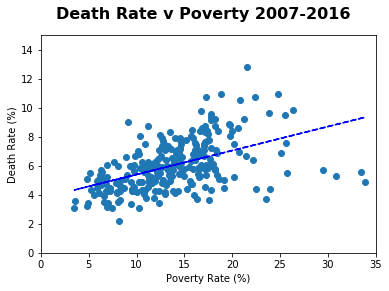

In [138]:
#perform linear regression of death rate versus poverty
fig, ax = plt.subplots()

fig.suptitle("Death Rate v Poverty 2007-2016", fontsize=16, fontweight="bold")

ax.set_xlim(0,35)
ax.set_ylim(0,15)

ax.set_xlabel("Poverty Rate (%)")
ax.set_ylabel("Death Rate (per 1000)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [139]:
p_value

9.850728813612898e-18

In [140]:
#start health insurance analysis
insurance_df = pd.read_csv("insurance.csv")

In [141]:
insurance_df.head()

,State,Year,Total,Private,Public
0,Alabama,2017.0,96.9,55.0,45.8
1,Alabama,2016.0,97.3,55.8,44.8
2,Alabama,2015.0,96.8,55.9,45.0
3,Alabama,2014.0,95.8,55.2,44.4
4,Alabama,2013.0,95.2,55.5,43.6


In [142]:
death_rates_state = pd.read_csv("death_rates_state.txt", delimiter="\t")

In [143]:
death_rates_state = death_rates_state[["State","Death Rate"]]

In [144]:
death_rates_state = death_rates_state.dropna(how="any")

In [145]:
death_rates_state.head()

,State,Death Rate
0,Alabama,8.83
1,Alaska,5.65
2,Arizona,5.93
3,Arkansas,7.55
4,California,4.71


In [146]:
insurance_group = insurance_df.groupby("State").mean()

In [147]:
insurance_group.head()

,Year,Total,Private,Public
State,,,,
Alabama,2012.5,95.16,56.93,41.90
Alaska,2012.5,87.96,60.11,32.79
Arizona,2012.5,88.46,54.97,36.96
Arkansas,2012.5,93.89,47.87,49.89
California,2012.5,92.96,56.08,40.19


In [148]:
insurance_merge = pd.merge(death_rates_state, insurance_group, on="State", how="left")

In [149]:
insurance_merge.head()

,State,Death Rate,Year,Total,Private,Public
0,Alabama,8.83,2012.5,95.16,56.93,41.90
1,Alaska,5.65,2012.5,87.96,60.11,32.79
2,Arizona,5.93,2012.5,88.46,54.97,36.96
3,Arkansas,7.55,2012.5,93.89,47.87,49.89
4,California,4.71,2012.5,92.96,56.08,40.19


In [150]:
x_axis = insurance_merge["Total"]
y_axis = insurance_merge["Death Rate"]

Text(0.5,1,'Death Rate v Total Insurance Rate')

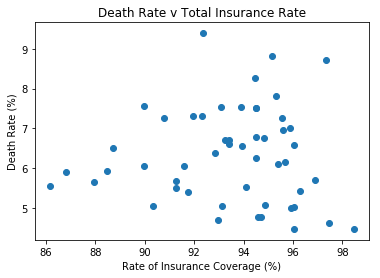

In [151]:
#graph the death rate versus total rate of insurance for all states
plt.scatter(x_axis, y_axis)
plt.ylabel("Death Rate (per 1000)")
plt.xlabel("Rate of Insurance Coverage (%)")
plt.title("Death Rate v Total Insurance Rate")

In [152]:
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)

In [153]:
p_value

0.9836866811526419

In [154]:
x2_axis = insurance_merge["Public"]

In [155]:
insurance_merge = insurance_merge.dropna(how="any")

In [156]:
insurance_merge.dtypes

State          object
Death Rate    float64
Year          float64
Total         float64
Private       float64
Public        float64
dtype: object

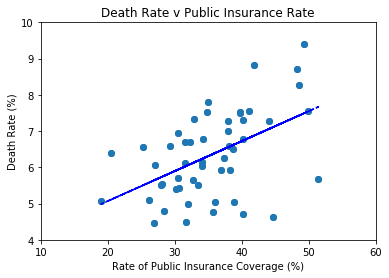

In [157]:
#plot death rate versus rate of public insurance
(slope, intercept, _, _, _) = linregress(x2_axis, y_axis)
fit = slope * x2_axis + intercept
slope, intercept, r_value, p_value, std_err = linregress(x2_axis, y_axis)

fig, ax = plt.subplots()

fig.suptitle("", fontsize=16, fontweight="bold")

ax.set_xlim(10,60)
ax.set_ylim(4,10)

# ax.set_xlabel("Poverty Rate (%)")
# ax.set_ylabel("Death Rate (%)")

ax.plot(x2_axis, y_axis, linewidth=0, marker='o')
ax.plot(x2_axis, fit, 'b--')
plt.scatter(x2_axis, y_axis)
plt.ylabel("Death Rate (per 1000)")
plt.xlabel("Rate of Public Insurance Coverage (%)")
plt.title("Death Rate v Public Insurance Rate")
plt.show()


In [158]:
p_value

0.00018406689781009939

In [159]:
x3_axis = insurance_merge["Private"]

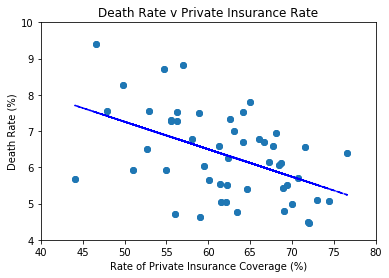

In [160]:
#plot death rate versus rate of private insurance
(slope, intercept, _, _, _) = linregress(x3_axis, y_axis)
fit = slope * x3_axis + intercept
slope, intercept, r_value, p_value, std_err = linregress(x3_axis, y_axis)

fig, ax = plt.subplots()

fig.suptitle("", fontsize=16, fontweight="bold")

ax.set_xlim(40,80)
ax.set_ylim(4,10)

# ax.set_xlabel("Poverty Rate (%)")
# ax.set_ylabel("Death Rate (%)")

ax.plot(x3_axis, y_axis, linewidth=0, marker='o')
ax.plot(x3_axis, fit, 'b--')
plt.scatter(x3_axis, y_axis)
plt.ylabel("Death Rate (per 1000)")
plt.xlabel("Rate of Private Insurance Coverage (%)")
plt.title("Death Rate v Private Insurance Rate")
plt.show()


In [161]:
p_value

0.0003313122078554712

In [162]:
#Start new analysis on top ten and bottom ten african american counties regarding death rate
AfricanAmerican20 = pd.read_csv("AfricanAmerican20.csv")

In [163]:
AfricanAmerican20

,County Code,Race Code,Deaths,Births,Death Rate
0,18003,2054-5,152,8647,17.58
1,22017,2054-5,376,22127,16.99
2,34001,2054-5,118,7219,16.35
3,39061,2054-5,612,38789,15.78
4,34021,2054-5,195,12363,15.77
5,6019,2054-5,151,9587,15.75
6,1073,2054-5,662,42655,15.52
7,36001,2054-5,103,6652,15.48
8,18141,2054-5,109,7068,15.42
9,20173,2054-5,147,9541,15.41


In [164]:
AfricanAmerican20 = AfricanAmerican20.rename(columns={"County Code": "County ID"})

In [165]:
african_merge = pd.merge(AfricanAmerican20, merge_group, on="County ID", how="left")

In [166]:
african_merge = african_merge[["County ID","Death Rate","All Ages in Poverty Percent"]]

In [167]:
african_merge

,County ID,Death Rate,All Ages in Poverty Percent
0,18003,17.58,14.57
1,22017,16.99,21.58
2,34001,16.35,13.53
3,39061,15.78,16.75
4,34021,15.77,10.83
5,6019,15.75,25.12
6,1073,15.52,17.30
7,36001,15.48,12.83
8,18141,15.42,16.66
9,20173,15.41,14.65


In [168]:
x_axis = african_merge["All Ages in Poverty Percent"]
y_axis = african_merge["Death Rate"]

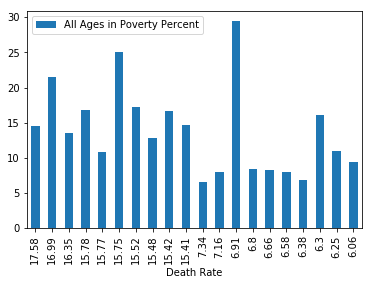

In [169]:
african_merge.set_index("County ID").plot.bar("Death Rate")

In [170]:
black_counties = pd.read_csv("black_counties.csv")

In [171]:
black_counties.head()

,County ID,Race,Race Code,Deaths,Births,Death Rate
0,1073,Black or African American,2054-5,662,42655,15.52
1,1089,Black or African American,2054-5,152,12260,12.40
2,1097,Black or African American,2054-5,302,24396,12.38
3,1999,Black or African American,2054-5,1395,107618,12.96
4,2020,Black or African American,2054-5,23,3381,6.80


In [172]:
black_merge = pd.merge(black_counties, merge_group, on="County ID", how="left")

In [173]:
black_merge = black_merge.dropna(how="any")

In [174]:
black_merge.head()

,County ID,Race,Race Code,Deaths,Births,Death Rate,Year,All Ages in Poverty Percent,Lat,Lng
0,1073,Black or African American,2054-5,662,42655,15.52,2011.5,17.30,33.553444,-86.896536
1,1089,Black or African American,2054-5,152,12260,12.40,2011.5,12.69,34.764238,-86.551080
2,1097,Black or African American,2054-5,302,24396,12.38,2011.5,19.71,30.684572,-88.196568
4,2020,Black or African American,2054-5,23,3381,6.80,2011.5,8.35,61.174250,-149.284329
5,4013,Black or African American,2054-5,420,36714,11.44,2011.5,15.88,33.346541,-112.495534


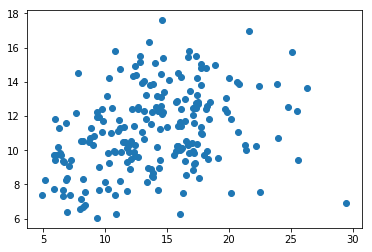

In [175]:
x_axis = black_merge["All Ages in Poverty Percent"]
y_axis = black_merge["Death Rate"]
plt.scatter(x_axis, y_axis)

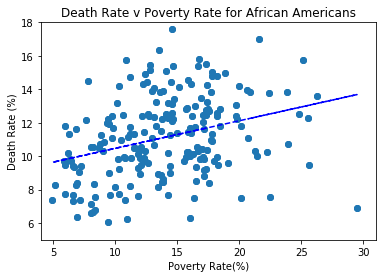

In [179]:
#plot death rate versus rate of private insurance
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)

fig, ax = plt.subplots()

fig.suptitle("", fontsize=16, fontweight="bold")

ax.set_xlim(4,31)
ax.set_ylim(5,18)

# ax.set_xlabel("Poverty Rate (%)")
# ax.set_ylabel("Death Rate (%)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')
plt.scatter(x_axis, y_axis)
plt.ylabel("Death Rate (per 1000)")
plt.xlabel("Poverty Rate (%)")
plt.title("Death Rate v Poverty Rate for African Americans")
plt.show()

In [176]:
p_value

0.0003313122078554712

In [180]:
white_counties = pd.read_csv("white_counties.csv")

In [181]:
white_counties.head()

,County ID,Race,Race Code,Deaths,Births,Death Rate
0,1073,White,2106-3,317,46960,6.75
1,1089,White,2106-3,177,28040,6.31
2,1097,White,2106-3,198,31675,6.25
3,1999,White,2106-3,2085,299903,6.95
4,2020,White,2106-3,120,29466,4.07


In [182]:
white_merge = pd.merge(white_counties, merge_group, on="County ID", how="left")

In [183]:
white_merge = white_merge.dropna(how="any")

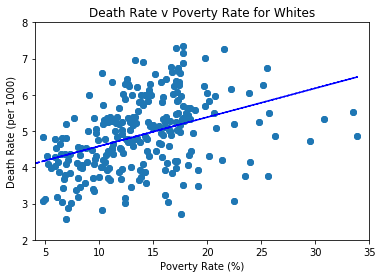

In [192]:
#plot death rate versus rate of private insurance
x_axis = white_merge["All Ages in Poverty Percent"]
y_axis = white_merge["Death Rate"]

(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)

fig, ax = plt.subplots()

fig.suptitle("", fontsize=16, fontweight="bold")

ax.set_xlim(4,35)
ax.set_ylim(2,8)

# ax.set_xlabel("Poverty Rate (%)")
# ax.set_ylabel("Death Rate (%)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')
plt.scatter(x_axis, y_axis)
plt.ylabel("Death Rate (per 1000)")
plt.xlabel("Poverty Rate (%)")
plt.title("Death Rate v Poverty Rate for Whites")
plt.show()

In [190]:
p_value

1.168129133468144e-11